In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.signal import argrelextrema
import numpy as np

In [2]:
df_s11 = pd.read_parquet("../data/03_primary/bitalino/S14_pic_BITAL.parquet")
df_s11 = df_s11.dropna(subset=["valence_rating"])

In [9]:
df_s11

,EKG,light,EDA,HR,image_id,person_id,valence_rating,arousal_rating,valence_norm,arousal_norm
148049,37080,9881,8910,65.145908,43922,S14,6.0,3.0,5.04,2.70
148050,37192,9768,8892,65.145908,43922,S14,6.0,3.0,5.04,2.70
148051,37256,9743,8948,65.145908,43922,S14,6.0,3.0,5.04,2.70
148052,37312,9671,8932,65.145908,43922,S14,6.0,3.0,5.04,2.70
148053,37376,9740,8898,65.145908,43922,S14,6.0,3.0,5.04,2.70
...,...,...,...,...,...,...,...,...,...,...
1490527,28088,11436,5435,69.368083,42031,S14,8.0,6.0,7.18,5.52
1490528,27832,11282,5380,69.368083,42031,S14,8.0,6.0,7.18,5.52
1490529,27584,11216,5391,69.368083,42031,S14,8.0,6.0,7.18,5.52
1490530,27352,11250,5400,69.368083,42031,S14,8.0,6.0,7.18,5.52


In [3]:
df_4111 = df_s11[df_s11["image_id"] == 41111].reset_index(drop=True).reset_index()
df_43211 = df_s11[df_s11["image_id"] == 43211].reset_index(drop=True).reset_index()
df_41911 = df_s11[df_s11["image_id"] == 41911].reset_index(drop=True).reset_index()

df_42932 = df_s11[df_s11["image_id"] == 42932].reset_index(drop=True).reset_index()
df_43232 = df_s11[df_s11["image_id"] == 43232].reset_index(drop=True).reset_index()
df_44031 = df_s11[df_s11["image_id"] == 44031].reset_index(drop=True).reset_index()

In [14]:
df_s11

,EKG,light,EDA,HR,image_id,person_id,valence_rating,arousal_rating,valence_norm,arousal_norm
148049,37080,9881,8910,65.145908,43922,S14,6.0,3.0,5.04,2.70
148050,37192,9768,8892,65.145908,43922,S14,6.0,3.0,5.04,2.70
148051,37256,9743,8948,65.145908,43922,S14,6.0,3.0,5.04,2.70
148052,37312,9671,8932,65.145908,43922,S14,6.0,3.0,5.04,2.70
148053,37376,9740,8898,65.145908,43922,S14,6.0,3.0,5.04,2.70
...,...,...,...,...,...,...,...,...,...,...
1490527,28088,11436,5435,69.368083,42031,S14,8.0,6.0,7.18,5.52
1490528,27832,11282,5380,69.368083,42031,S14,8.0,6.0,7.18,5.52
1490529,27584,11216,5391,69.368083,42031,S14,8.0,6.0,7.18,5.52
1490530,27352,11250,5400,69.368083,42031,S14,8.0,6.0,7.18,5.52


In [57]:
df_x = pd.read_parquet("../data/03_primary/bitalino/S46_pic_BITAL.parquet")
df_x = df_x.reset_index(drop=True).reset_index()

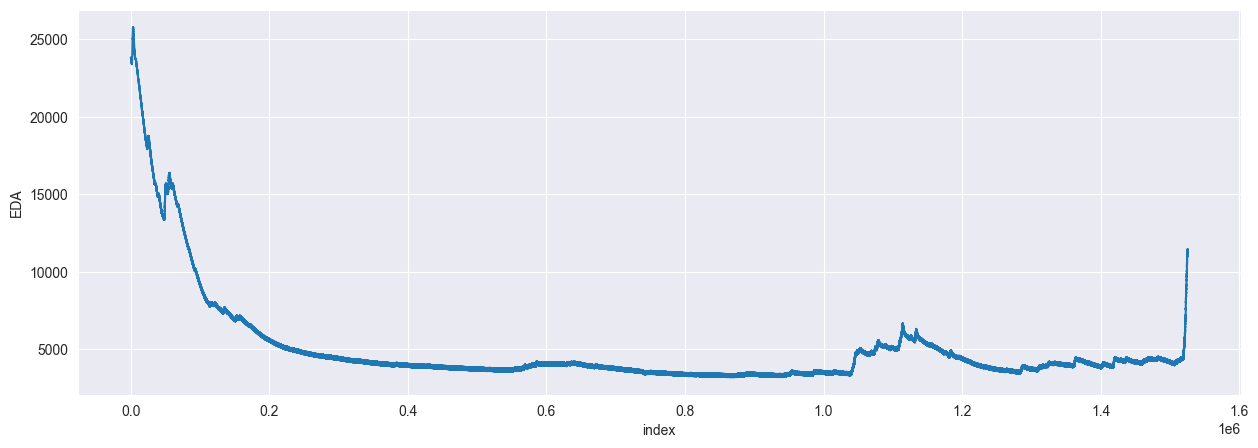

In [58]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_x.reset_index(drop=True).reset_index(), x="index", y="EDA")
plt.show()

In [99]:
df_x.shape

(1525652, 11)

In [103]:
dfy = df_x.iloc[200000:1200000:100].copy()
dfy["smooth"] = dfy["HR"].ewm(span=20000).mean()
dfy = dfy.dropna(subset="valence_rating")

In [106]:
dfy.iloc[0:2]

,index,EKG,light,EDA,HR,image_id,person_id,valence_rating,arousal_rating,valence_norm,arousal_norm,smooth
201800,201800,32965,3386,5455,77.639299,42121,S46,5.0,1.0,5.15712,2.66944,82.250830
201900,201900,33268,3829,5462,77.639299,42121,S46,5.0,1.0,5.15712,2.66944,82.020034


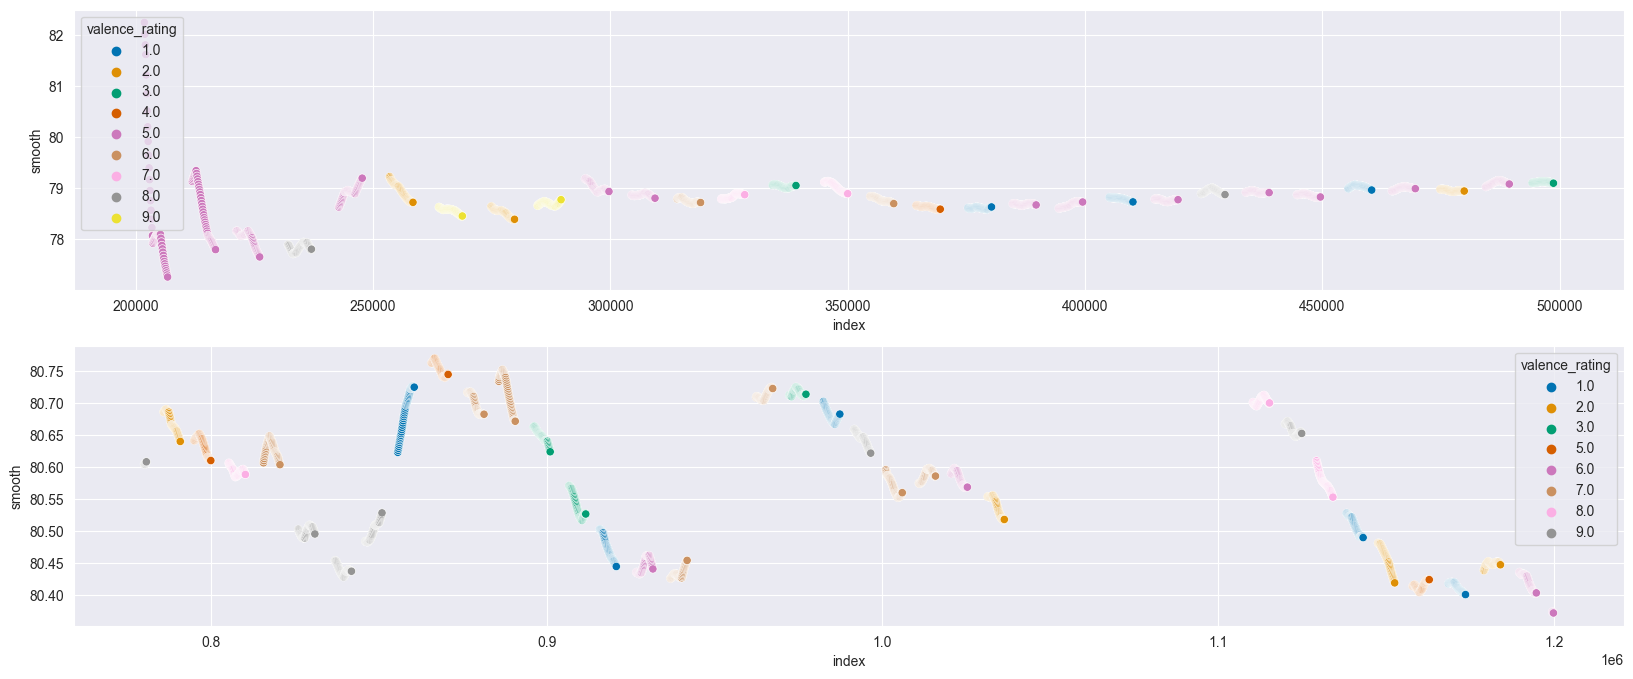

In [115]:
plt.figure(figsize=(20, 8))
plt.subplot(211)
sns.scatterplot(data=dfy.iloc[:1500], x="index", y="smooth", hue="valence_rating", palette="colorblind")
plt.subplot(212)
sns.scatterplot(data=dfy.iloc[2500:], x="index", y="smooth", hue="valence_rating", palette="colorblind")
plt.show()

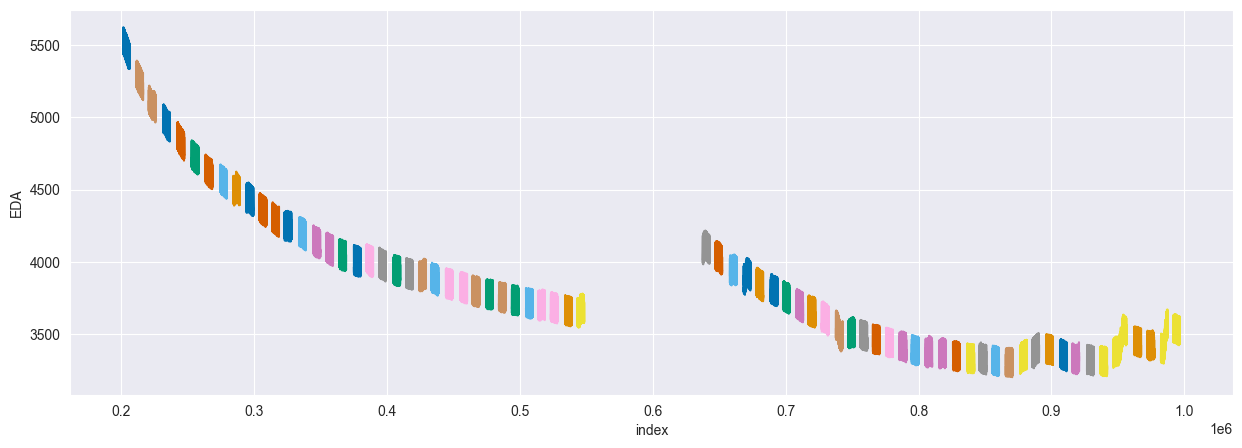

In [60]:
dfy = df_x.iloc[200000:1000000]
dfy = dfy.dropna(subset="valence_rating")
plt.figure(figsize=(15, 5))
sns.lineplot(data=dfy, x="index", y="EDA", hue="image_id", palette="colorblind", legend=None)

plt.show()

<Axes: xlabel='index', ylabel='valence_rating'>

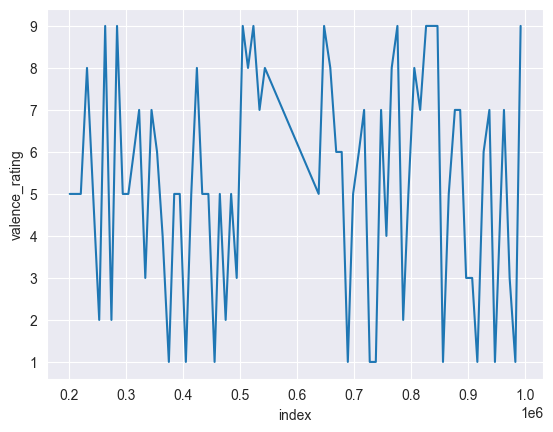

In [62]:
dfz = dfy.drop_duplicates(["image_id", "valence_rating"]).reset_index(drop=True).reset_index()
sns.lineplot(data=dfz, x="index", y="valence_rating")

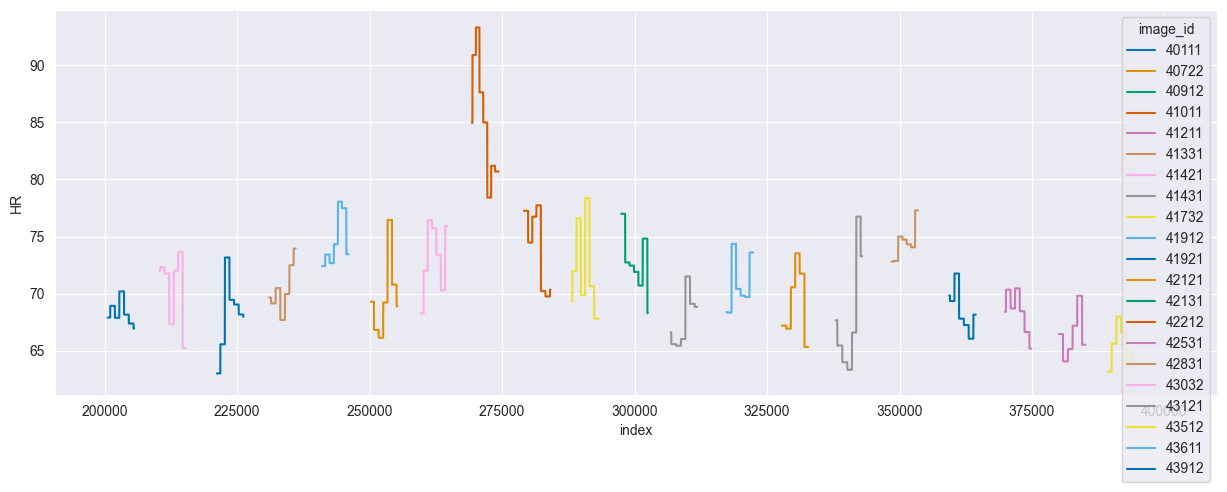

In [44]:
dfy = df_x.iloc[200000:400000]
dfy = dfy.dropna(subset="valence_rating")
plt.figure(figsize=(15, 5))
sns.lineplot(data=dfy, x="index", y="HR", hue="image_id", palette="colorblind")
plt.show()

In [4]:
df_s11.groupby("valence_rating").mean(numeric_only=True)

,EKG,light,EDA,HR,image_id,arousal_rating,valence_norm,arousal_norm
valence_rating,,,,,,,,
2.0,32837.632645,10795.358933,5915.047925,61.751511,40611.000000,8.000000,1.820000,5.750000
3.0,32817.261965,11072.427725,5692.648581,64.932861,42055.451698,5.142983,2.453415,5.642264
4.0,32801.104985,11047.220322,5889.204849,66.418273,42232.075966,4.100862,3.086261,8.697574
5.0,32871.624136,11091.337511,6068.729294,66.292302,41747.729277,2.875702,5.148009,4.633434
6.0,32840.036754,10934.401101,6196.810948,65.328458,42085.952867,3.429892,5.759423,4.892298
7.0,32810.806536,10993.503979,5940.062658,65.827600,42204.220345,4.374136,6.253409,4.721151
8.0,32840.043065,11154.868434,6096.647369,66.673193,42480.352232,4.750849,7.513590,4.904157


<Axes: xlabel='index', ylabel='EDA'>

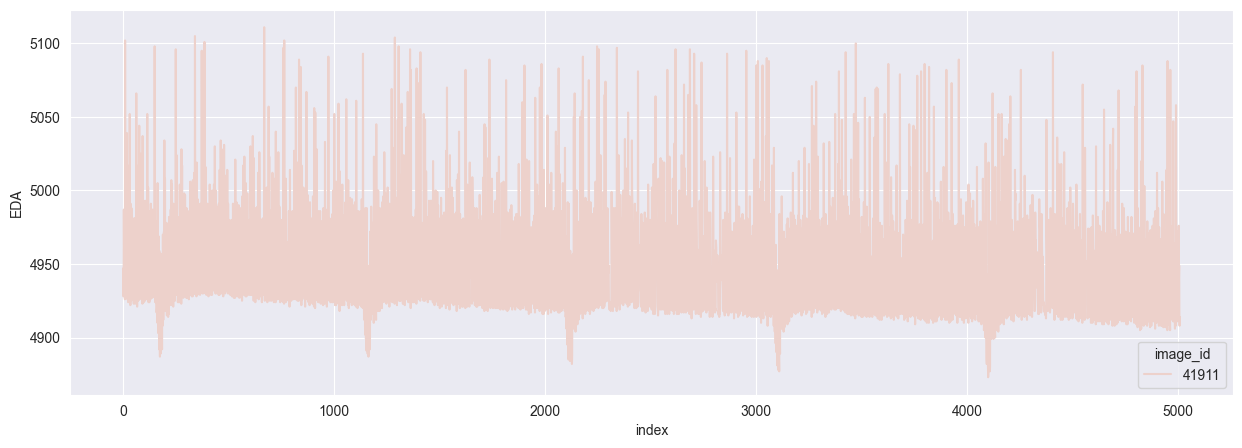

In [30]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_41911, x="index", y="EDA", hue="image_id")

<Axes: xlabel='index', ylabel='EDA'>

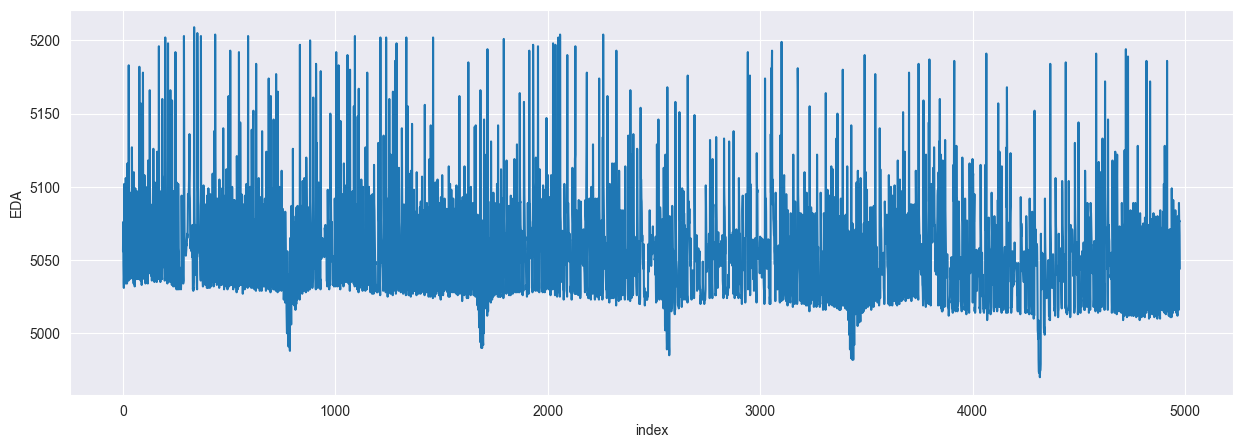

In [50]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_43232, x="index", y="EDA")

<Axes: xlabel='index', ylabel='HR'>

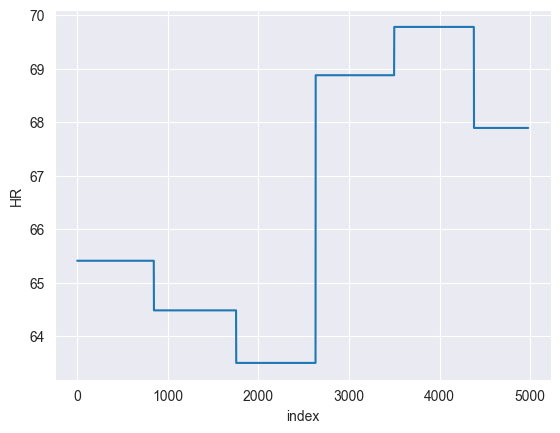

In [46]:
sns.lineplot(data=df_43232, x="index", y="HR")

<Axes: xlabel='index', ylabel='HR'>

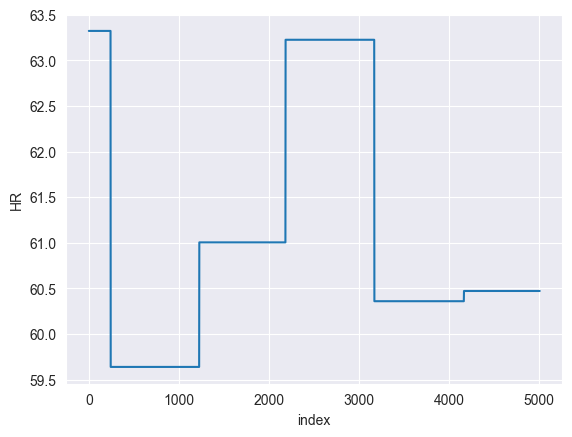

In [43]:
sns.lineplot(data=df_41911, x="index", y="HR")

In [38]:
df_42932

,index,EKG,light,EDA,HR,image_id,person_id,valence_rating,arousal_rating,valence_norm,arousal_norm
0,0,31952,9782,5052,71.308366,42932,S14,8.0,5.0,7.44,4.96
1,1,31960,9593,5038,71.308366,42932,S14,8.0,5.0,7.44,4.96
2,2,31954,9872,5008,71.308366,42932,S14,8.0,5.0,7.44,4.96
3,3,31974,9936,4996,71.308366,42932,S14,8.0,5.0,7.44,4.96
4,4,32024,9995,4987,71.308366,42932,S14,8.0,5.0,7.44,4.96
...,...,...,...,...,...,...,...,...,...,...,...
5007,5007,30824,10649,4993,63.546182,42932,S14,8.0,5.0,7.44,4.96
5008,5008,30896,10532,4994,63.546182,42932,S14,8.0,5.0,7.44,4.96
5009,5009,30944,10534,4992,63.546182,42932,S14,8.0,5.0,7.44,4.96
5010,5010,31012,10581,4984,63.546182,42932,S14,8.0,5.0,7.44,4.96


In [32]:
n = 500
xd_4111 = df_4111.iloc[argrelextrema(df_4111["EKG"].values, np.greater_equal, order=n)[0]]["index"].diff().mean()
xd_43211 = df_43211.iloc[argrelextrema(df_43211["EKG"].values, np.greater_equal, order=n)[0]]["index"].diff().mean()
xd_41911 = df_41911.iloc[argrelextrema(df_41911["EKG"].values, np.greater_equal, order=n)[0]]["index"].diff().mean()

xd_42932 = df_42932.iloc[argrelextrema(df_42932["EKG"].values, np.greater_equal, order=n)[0]]["index"].diff().mean()
xd_43232 = df_43232.iloc[argrelextrema(df_43232["EKG"].values, np.greater_equal, order=n)[0]]["index"].diff().mean()
xd_44031 = df_44031.iloc[argrelextrema(df_44031["EKG"].values, np.greater_equal, order=n)[0]]["index"].diff().mean()

In [33]:
def my_algo(df_full, images, name):
    dct = pd.DataFrame(columns=["image_id", name, "mean_diff"])
    for image in images:
        df_partial = df_full[df_full["image_id"] == image].reset_index(drop=True).reset_index()
        mean = df_partial.iloc[argrelextrema(df_partial["EKG"].values, np.greater_equal, order=n)[0]]["index"].diff().mean()
        maxi = df_partial.iloc[argrelextrema(df_partial["EKG"].values, np.greater_equal, order=n)[0]]["index"].diff().max()
        mini = df_partial.iloc[argrelextrema(df_partial["EKG"].values, np.greater_equal, order=n)[0]]["index"].diff().min()

        rating = df_partial[name].iloc[0]
        item = pd.DataFrame({"image_id": [image],
                             name: [rating],
                             "mean_diff": [mean],
                             "maxi_diff": [maxi],
                             "mini_diff": [mini]})
        dct = pd.concat([dct, item])
    return dct


In [34]:
df_result_valence_rating = my_algo(df_s11, df_s11["image_id"].unique().tolist(), "valence_rating")

In [35]:
df_result_valence_rating

,image_id,valence_rating,mean_diff,maxi_diff,mini_diff
0,43922,6.0,859.800000,918.0,688.0
0,43022,6.0,893.000000,921.0,867.0
0,43932,7.0,692.428571,873.0,6.0
0,41331,7.0,760.666667,921.0,1.0
0,43011,3.0,873.000000,923.0,842.0
...,...,...,...,...,...
0,43632,7.0,924.800000,951.0,898.0
0,41511,4.0,903.800000,924.0,885.0
0,42822,5.0,916.800000,943.0,905.0
0,42522,6.0,861.600000,930.0,703.0


C:\Users\dbugajny\AppData\Local\Temp\ipykernel_17264\3387883694.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_result_valence_rating, x="mean_diff", hue="valence_rating", common_norm=False, palette="colorblind")


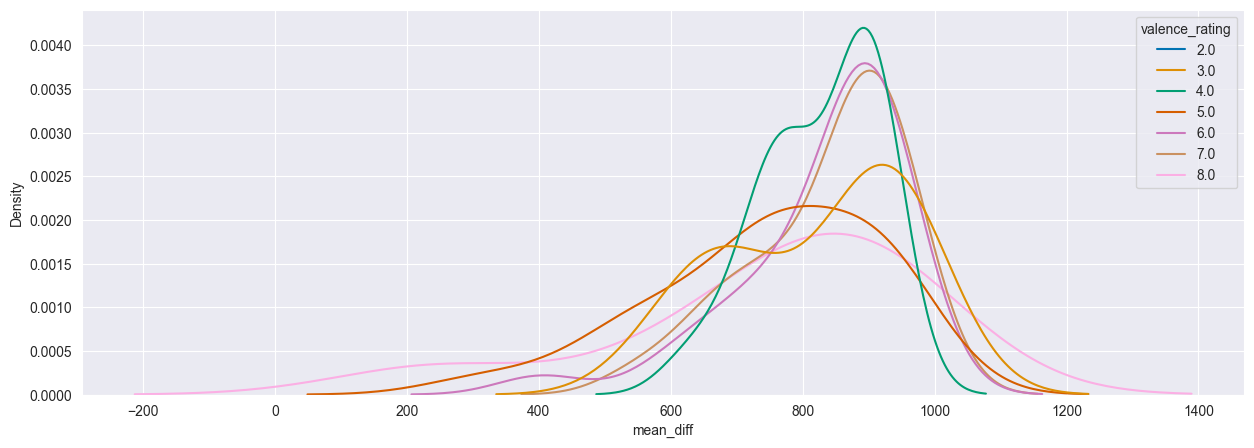

In [36]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df_result_valence_rating, x="mean_diff", hue="valence_rating", common_norm=False, palette="colorblind")
plt.show()

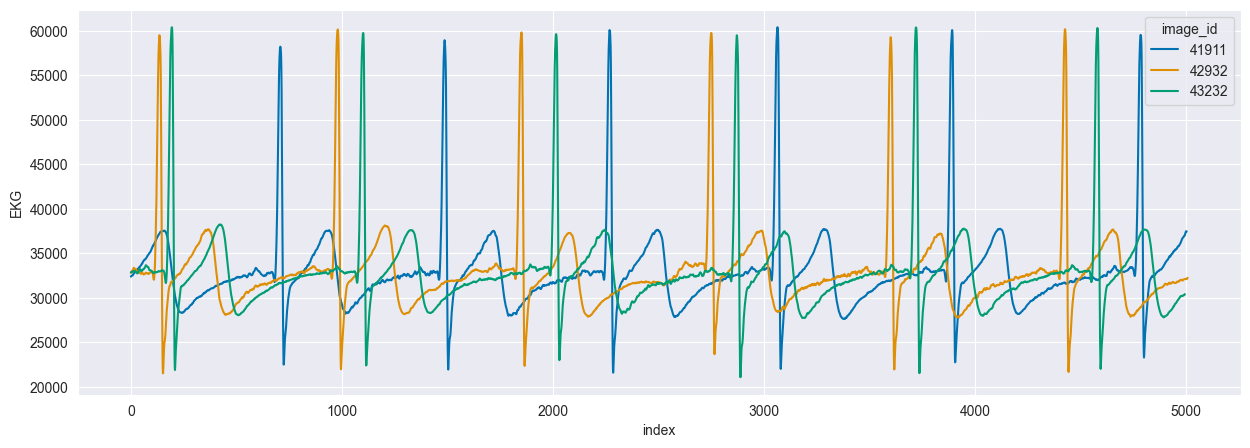

In [21]:
plt.figure(figsize=(15, 5))
# cc = pd.concat([df_4111, df_43211,df_41212, df_42932, df_43232, df_43632])
cc = pd.concat([ df_41911, df_42932, df_43232])

sns.lineplot(data=cc, x="index", y="EKG", hue="image_id", palette="colorblind")
plt.show()